# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [113]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import binom

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [139]:
# Para guardar las "variables" creo un diccionario con los arrays
sample_size = [10, 50, 500, 5000]
dct = {"normal_{}".format(i+1): norm.rvs(size=sample_size[i],loc=50,scale=5) for i in range(4)}


In [64]:
lst = list(dct.values())
results = {"k{0}, p{0}".format(i+1): stats.normaltest(lst[i]) for i in range(len(lst))}


In [65]:
lst_results = list(results.values())
alpha = 0.05

for i in range(len(lst_results)):
    if lst_results[i][1] < alpha:
        print("The null hypothesis can be rejected")
    else:
        print("Sample {}: H1 accepted. The sample follows a normal distribution.".format(i+1))


Sample 1: H1 accepted. The sample follows a normal distribution.
Sample 2: H1 accepted. The sample follows a normal distribution.
The null hypothesis can be rejected
Sample 4: H1 accepted. The sample follows a normal distribution.


#### Interpret the normaltest results and make your observations.

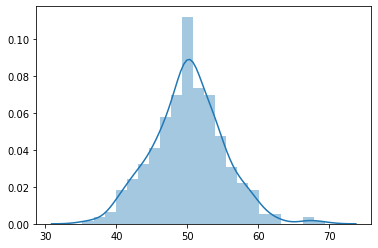

In [71]:
ex1 = sns.distplot(dct["normal_3"])
                 

La hipótesis nula es la no distribución normal de los valores muestrales. El valor P lo que indica es la probabilidad de que la hipótesis nula sea cierta, si es menor que el nivel de significación la muestra acepta la hipótesis alternativa: sigue una distribución normal.

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

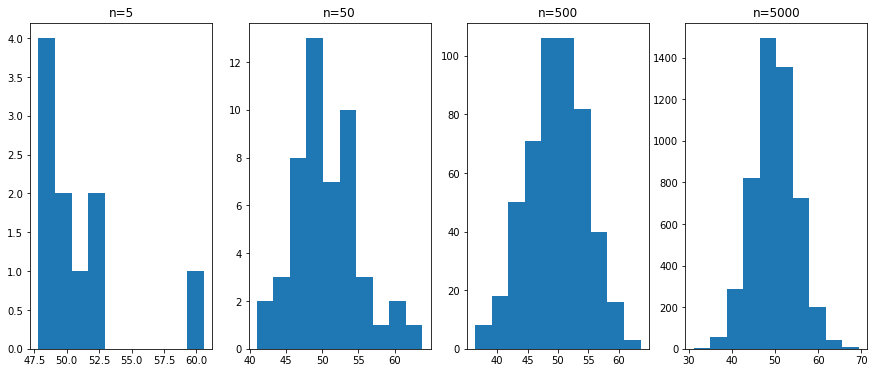

In [142]:

fig, axes=plt.subplots(1,4,figsize=(15,6))
axes[0].hist(dct["normal_1"])
axes[0].set_title("n=5")
axes[1].hist(dct["normal_2"])
axes[1].set_title("n=50")
axes[2].hist(dct["normal_3"])
axes[2].set_title("n=500")
axes[3].hist(dct["normal_4"])
axes[3].set_title("n=5000");

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

He repetido la aleatorización hasta que una muestra estuviera recogida bajo la hipótesis nula. Me llama la atención que sea la de tamaño muestral 500... ¿?

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

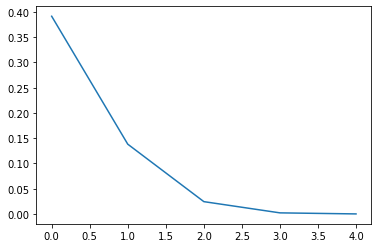

In [116]:
from scipy.stats import binom
p = 0.15
n = 5
x = range(1,n+1)
binomial = binom.pmf(x,n,p)

plt.plot(binomial)
plt.show()

#### Explain what you observe from the plot above

Cada punto de la gráfica indica la probabilidad discreta de que ocurra ese evento. En este caso, se ve que la probabilidad de que entre 5 personas 1 clique en el anuncio es muy alta y va decreciendo.

#### Now plot PMP with 50, 500, and 5000 visitors.

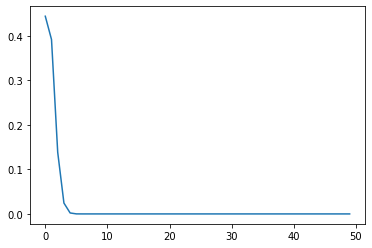

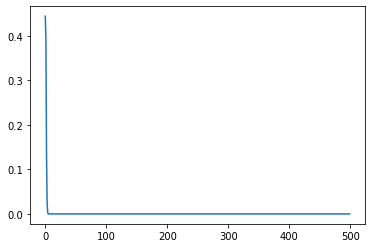

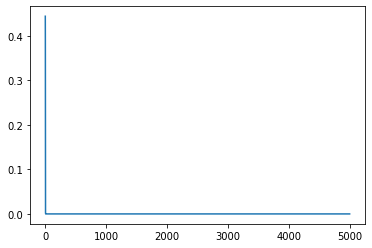

In [124]:
binomial50 = binom.pmf(range(50),n,p)
binomial500 = binom.pmf(range(500),n,p)
binomial5000 = binom.pmf(range(5000),n,p)


plt.plot(binomial50)
plt.figure()
plt.plot(binomial500)
plt.figure()
plt.plot(binomial5000)
plt.show()

#### What did you notice from the distribution plots? Comment your findings.

Las gráficas dejan de tener valor, no son informativas. Es la demostración de que la función binomial es útil para tamaños muestrales pequeños.

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.


Distribuye la probabilidad de una variable que es discreta en un intervalo continuo.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [127]:
from scipy.stats import poisson

mu = 300
x = 320
poisson = poisson.pmf(x, mu)

print(poisson)

0.011612348610402475


#### What is the probability of getting 60 visits?

In [134]:
x = 60
mu= 300

poisson2 = poisson.pmf(x, mu)
print(poisson2)

2.622743762294515e-64


#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

In [136]:
probabilities = [poisson.pmf(i, mu) for i in range(1001)]
len(probabilities)

1001

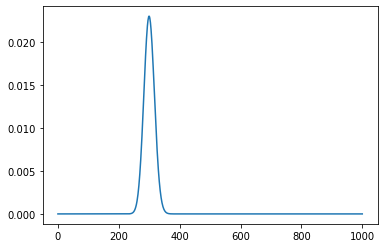

In [138]:
print(plt.plot(probabilities))